<a href="https://colab.research.google.com/github/SzymonLabedziewski/Metody-Inteligencji-Obliczeniowej/blob/main/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/MIO"

Mounted at /content/drive
lab02_fuel.txt	lab03.ipynb	    lab03_yeast.data   lab04_Advertising.csv
lab02.ipynb	lab03_medicine.txt  lab03_yeast.names  lab04.ipynb


# 1.1
**Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję 𝑍(𝑤<sub>TV</sub>, 𝑤<sub>𝑟𝑎𝑑𝑖𝑜</sub>, 𝑤<sub>𝑝𝑟𝑎𝑠𝑎</sub>).**

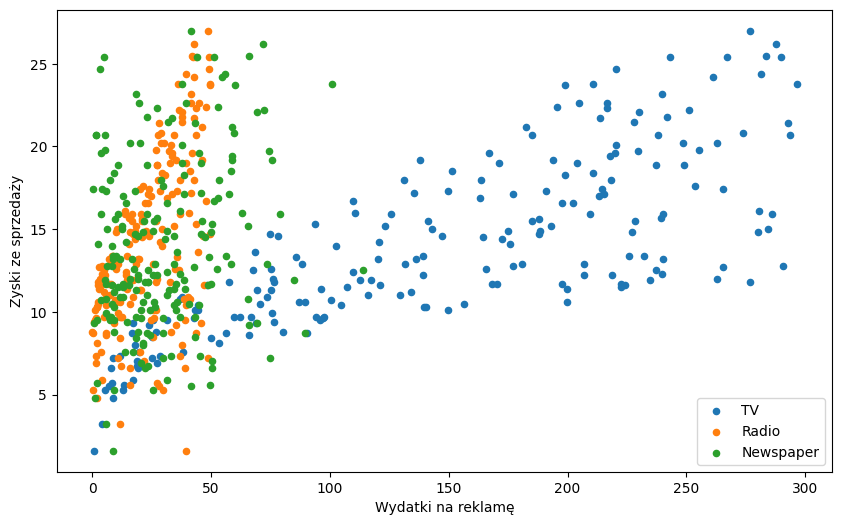

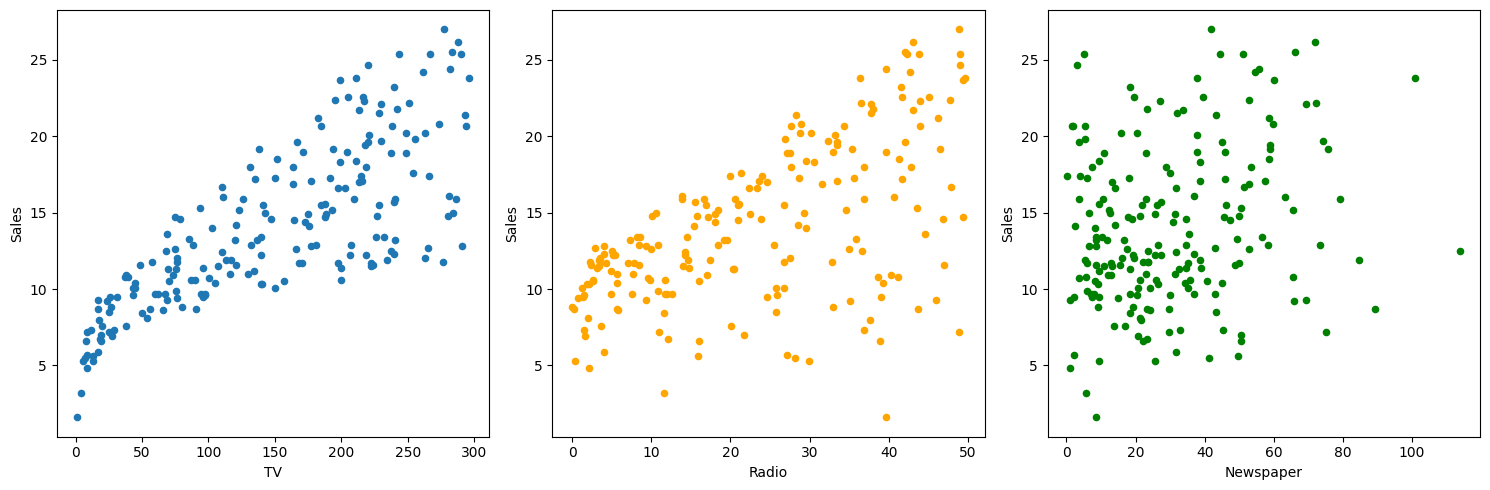

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MIO/lab04_Advertising.csv')
data.head()


X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# wykres waretosci tv, radio, newspaper na osi x do sales na osi y
plt.figure(figsize=(10, 6))
plt.scatter(X['TV'], y, s=20, label='TV')
plt.scatter(X['Radio'], y, s=20, label='Radio')
plt.scatter(X['Newspaper'], y, s=20, label='Newspaper')
plt.xlabel('Wydatki na reklamę')
plt.ylabel('Zyski ze sprzedaży')
plt.legend()
plt.show()



fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].scatter(X['TV'], y, s=20)
axes[0].set_xlabel('TV')
axes[0].set_ylabel('Sales')

axes[1].scatter(X['Radio'], y, s=20, color = 'orange')
axes[1].set_xlabel('Radio')
axes[1].set_ylabel('Sales')

axes[2].scatter(X['Newspaper'], y, s=20, color='green')
axes[2].set_xlabel('Newspaper')
axes[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


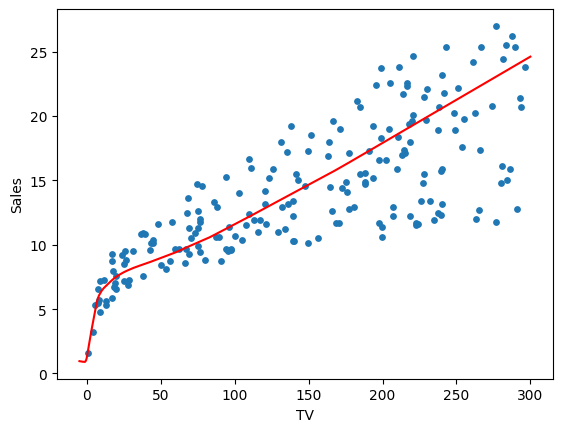

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


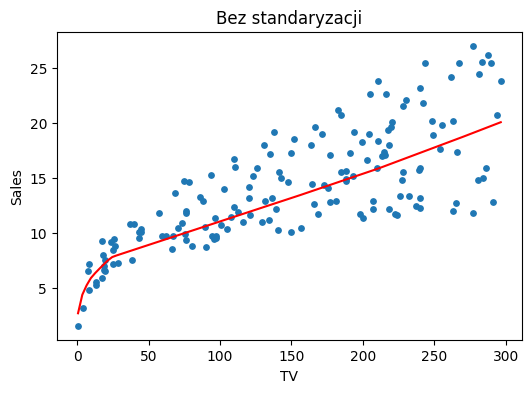

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


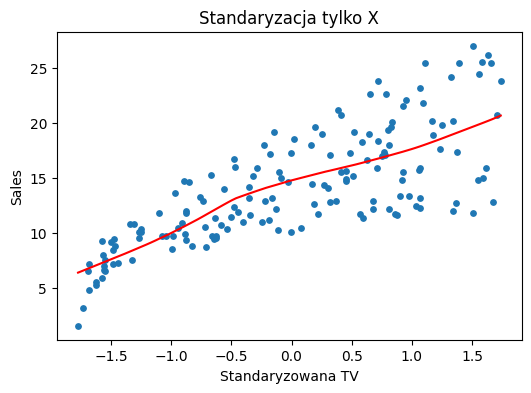

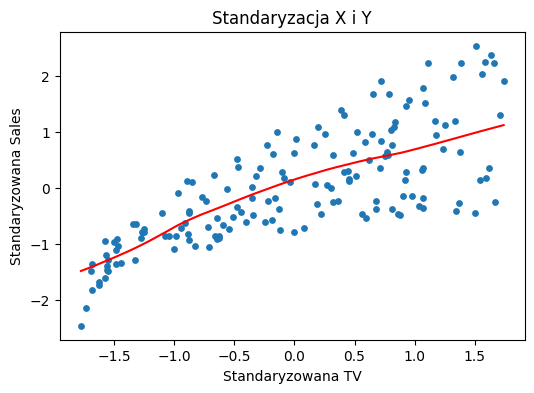

In [ ]:
network_test = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100), activation='relu', solver='adam', max_iter=1000, tol = 0.001)
network_test.fit(X[['TV']], y)
Xtest_space = np.arange(-5., 300, 0.05)
Ytest_predict = network_test.predict(Xtest_space.reshape(-1, 1))

plt.scatter(X['TV'], y, s=15)
plt.plot(Xtest_space, Ytest_predict, color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X[['TV']], y, test_size=0.2, random_state=42)

# Wykres bez standaryzacji
network = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', max_iter=1000, tol=0.001)
network.fit(X_train, y_train)

X_TV_space = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
Y_TV_predict = network.predict(X_TV_space)

plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, s=15)
plt.plot(X_TV_space, Y_TV_predict, color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Bez standaryzacji')
plt.show()


# Wykres ze standaryzacją X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

network.fit(X_train_scaled, y_train)

X_TV_space_scaled = scaler_X.transform(X_TV_space)
Y_TV_predict_scaled = network.predict(X_TV_space_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_train_scaled, y_train, s=15)
plt.plot(X_TV_space_scaled, Y_TV_predict_scaled, color='red')
plt.xlabel('Standaryzowana TV')
plt.ylabel('Sales')
plt.title('Standaryzacja tylko X')
plt.show()


# Wykres ze standaryzacją X i Y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

network.fit(X_train_scaled, y_train_scaled)

Y_TV_predict_scaled = network.predict(X_TV_space_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_train_scaled, y_train_scaled, s=15)
plt.plot(X_TV_space_scaled, Y_TV_predict_scaled, color='red')
plt.xlabel('Standaryzowana TV')
plt.ylabel('Standaryzowana Sales')
plt.title('Standaryzacja X i Y')
plt.show()

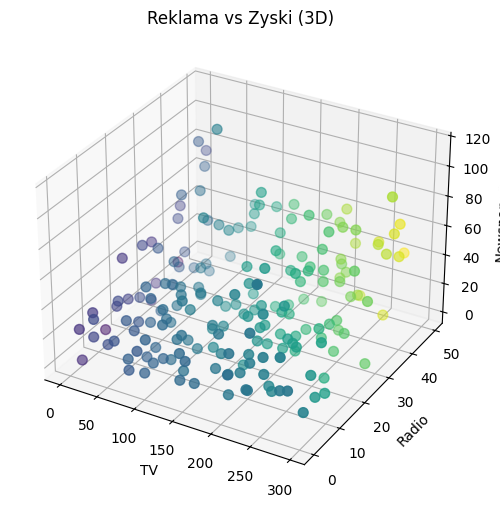

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Wykres 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['TV'], X['Radio'], X['Newspaper'], c=y, cmap='viridis', s=50)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
ax.set_title('Reklama vs Zyski (3D)')

plt.show()


# 1.2

**Proszę zaproponować architekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci.**

**Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące i o pilnowaniu skali danych.**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model relu_50: MSE = 0.4207
Model relu_200: MSE = 0.4269
Model tanh_50: MSE = 0.8456
Model tanh_200: MSE = 0.3815


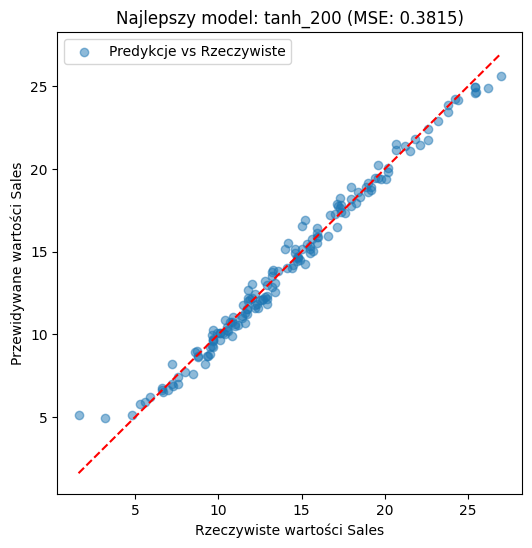

In [ ]:
from sklearn.metrics import mean_squared_error

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Trening modeli
models = {
    "relu_50": MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu', solver='adam', max_iter=1000),
    "relu_200": MLPRegressor(hidden_layer_sizes=(200, 200, 200), activation='relu', solver='adam', max_iter=1000),
    "tanh_50": MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='tanh', solver='adam', max_iter=1000),
    "tanh_200": MLPRegressor(hidden_layer_sizes=(200, 200, 200), activation='tanh', solver='adam', max_iter=1000),
}

# Ewaluacja modeli
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse


for model, mse in results.items():
    print(f"Model {model}: MSE = {mse:.4f}")


best_model = min(results, key=results.get)
y_pred_best = models[best_model].predict(X_test_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5, label="Predykcje vs Rzeczywiste")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--",)
plt.xlabel("Rzeczywiste wartości Sales")
plt.ylabel("Przewidywane wartości Sales")
plt.title(f"Najlepszy model: {best_model} (MSE: {results[best_model]:.4f})")
plt.legend()
plt.show()


> Bardzo dobra jakość aproksymacji – punkty są mocno skupione wokół czerwonej linii idealnych predykcji, co wskazuje, że model dobrze odwzorowuje zależności w danych.
>
>Nie widać wyraźnych obszarów, w których predykcje modelu systematycznie odbiegają od rzeczywistości, co sugeruje dobrze dopasowaną architekturę.
>
>Można dostrzec kilka punktów bardziej oddalonych od linii, co może oznaczać trudność modelu w przewidywaniu pewnych specyficznych przypadków (np. nietypowych wydatków reklamowych).
>
>Tanh_200 okazał się najlepszym modelem. Niskie MSE oraz bliskie dopasowanie do linii odwzorującej funkcję y=x potwierdzają, że zwiększona liczba neuronów i tanh skutecznie modelują zależność między wydatkami a sprzedażą.

*Sieci neuronowe wykorzystujące funkcję aktywacji ReLU ogólnie osiągnęły lepsze wyniki niż te oparte na Tanh, co potwierdziły niższe wartości błędu MSE. Szczególnie w przypadku mniejszych modeli sieci z Tanh wykazywały znacznie gorszą skuteczność (MSE = 0.8456 dla tanh_50), jednak ich wydajność znacząco wzrastała wraz ze zwiększeniem liczby neuronów (tanh_200: MSE = 0.3815).*

*Zwiększanie liczby neuronów nie zawsze prowadziło do poprawy wyników. Dla ReLU większa architektura (relu_200) nie przyniosła zauważalnych korzyści, a wręcz spowodowała minimalny wzrost błędu w porównaniu do mniejszej wersji (relu_50). Natomiast w przypadku Tanh efekt był odwrotny - większa liczba neuronów znacząco poprawiła dokładność modelu.*


---



---



# 2
**Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji  f(x)=sin(x)  w przedziale  [−2π,2π] . Proszę użyć  tanh  jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.**

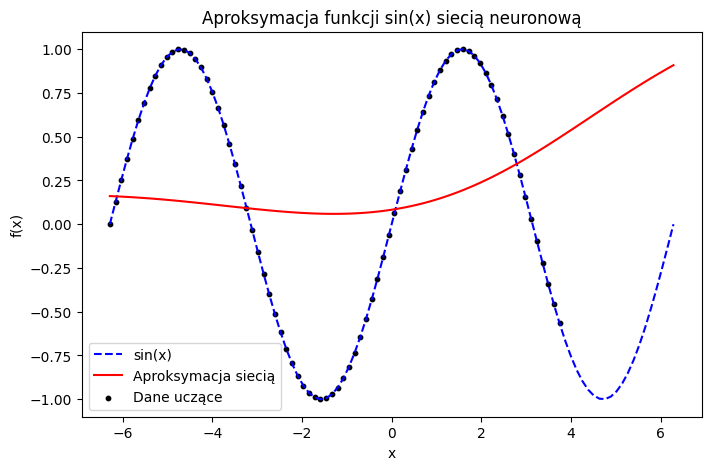

Wagi wejście → warstwa ukryta:
[[-0.02109412  0.66222064  0.22646258  0.44669292 -0.45504136]]

Biasy warstwy ukrytej:
[-0.85397273 -1.21095132  0.92611331  0.04258392  0.3717135 ]

Wagi warstwa ukryta → wyjście:
[[-1.15421057]
 [ 0.75105728]
 [ 0.75000866]
 [-0.92270694]
 [-0.43116936]]

Bias warstwy wyjściowej:
[-0.46626872]


In [ ]:
np.random.seed(42)
X = np.linspace(-2 * np.pi, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(X).flatten()

X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Budowa i trening minimalnej sieci neuronowej (1 warstwa ukryta, 5 neuronów)
network = MLPRegressor(hidden_layer_sizes=(5,), activation='tanh', solver='adam', max_iter=5000, random_state=42)
network.fit(X_train_scaled, y_train)

# Predykcja na pełnym zakresie
X_full_scaled = scaler.transform(X)
y_pred = network.predict(X_full_scaled)


plt.figure(figsize=(8, 5))
plt.plot(X, y, label="sin(x)", linestyle="dashed", color="blue")
plt.plot(X, y_pred, label="Aproksymacja siecią", color="red")
plt.scatter(X_train, y_train, label="Dane uczące", color="black", s=10)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Aproksymacja funkcji sin(x) siecią neuronową")
plt.show()


weights_input_hidden = network.coefs_[0]    # Wagi od wejścia do warstwy ukrytej
weights_hidden_output = network.coefs_[1]   # Wagi od warstwy ukrytej do wyjścia

bias_hidden = network.intercepts_[0]  # Biasy warstwy ukrytej
bias_output = network.intercepts_[1]  # Bias warstwy wyjściowej

print("Wagi wejście → warstwa ukryta:")
print(weights_input_hidden)

print("\nBiasy warstwy ukrytej:")
print(bias_hidden)

print("\nWagi warstwa ukryta → wyjście:")
print(weights_hidden_output)

print("\nBias warstwy wyjściowej:")
print(bias_output)


In [ ]:
W1 = network.coefs_[0]  # (macierz: 1 × n_hidden)
b1 = network.intercepts_[0]  # (wektor: n_hidden)
W2 = network.coefs_[1].flatten()  # (wektor: n_hidden)
b2 = network.intercepts_[1][0]  # (skalar)


approx_function = "f_approx(x) = "
terms = [f"{W2[i]:.4f} * tanh({W1[0][i]:.4f} * x + {b1[i]:.4f})" for i in range(len(W1[0]))]
approx_function += " + ".join(terms)
approx_function += f" + {b2:.4f}"


print("Końcowy wzór funkcji aproksymującej:")
print(approx_function)


Końcowy wzór funkcji aproksymującej:
f_approx(x) = -1.1542 * tanh(-0.0211 * x + -0.8540) + 0.7511 * tanh(0.6622 * x + -1.2110) + 0.7500 * tanh(0.2265 * x + 0.9261) + -0.9227 * tanh(0.4467 * x + 0.0426) + -0.4312 * tanh(-0.4550 * x + 0.3717) + -0.4663


$f_{\text{approx}}(x) = \sum_{i=1}^{n} W_2[i] \cdot \tanh(W_1[i] \cdot x + b_1[i]) + b_2$


$f_{\text{approx}}(x) = -1.1542 \cdot \tanh(-0.0211 \cdot x - 0.8540) + 0.7511 \cdot tanh(0.6622 \cdot x - 1.2110) + 0.7500 \cdot tanh(0.2265 \cdot x + 0.9261) - 0.9227 \cdot tanh(0.4467 \cdot x + 0.0426) - 0.4312 \cdot tanh(-0.4550 \cdot x + 0.3717) - 0.4663$


>Minimalna architektura; sieć neuronowa z jedną warstwą ukrytą i tylko 5 neuronami dobrze aproksymuje funkcję sin(x).
>
>Funkcja aktywacji Tanh dobrze odwzorowuje sinusoidę, ze względu na swoją sigmoidalną charakterystykę, Tanh naturalnie pasuje do aproksymacji funkcji okresowych.



---



---



# 3.1
**Proszę o wykorzystanie rzeczywistego zbioru danych medycznych (diabetes) z biblioteki sklearn.datasets (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), w którym celem jest przewidywanie stopnia zaawansowania choroby cukrzycowej na podstawie zestawu cech opisujących pacjenta.**

**Proszę przeskalować dane do jednej skali i podzielić je na dane uczące i testujące. Proszę zaproponować co najmniej 5 różnych architektur sieci neuronowych, dla każdej z nich policzyć wyniki za pomocą MSE, MAPE i R^2.**

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_percentage_error, r2_score


diabetes_data = load_diabetes()

X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target


scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definicja 5 różnych architektur sieci neuronowych
architectures = [
    (50,),
    (100, 50),
    (150, 100, 50),
    (100, 100, 100),
    (200, 150, 100, 50)
]

# Funkcja do obliczania MSE, MAPE i R^2
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mape, r2

# Trening i ewaluacja modeli
results = []

for arch in architectures:
    model = MLPRegressor(hidden_layer_sizes=arch, activation='relu', solver='adam', max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Ocena modelu
    mse, mape, r2 = evaluate_model(model, X_test_scaled, y_test)

    results.append({
        'Architecture': arch,
        'MSE': mse,
        'MAPE': mape,
        'R^2': r2
    })


results_df = pd.DataFrame(results)
print(results_df)



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


          Architecture          MSE      MAPE       R^2
0                (50,)  3806.169241  0.400418  0.281604
1            (100, 50)  2696.231795  0.351659  0.491100
2       (150, 100, 50)  5712.177451  0.520637 -0.078145
3      (100, 100, 100)  6877.127117  0.582535 -0.298024
4  (200, 150, 100, 50)  4555.811326  0.455702  0.140113


>Najlepsza architektura pod względem wszystkich metryk to (100, 50), osiągając najniższe MSE (2696.23), stosunkowo niskie MAPE (0.3517) i najwyższy R² (0.4911). Wskazuje to, że umiarkowana liczba neuronów pozwala modelowi dobrze dopasować się do danych.
>
>Najprostsza sieć (50 neuronów w jednej warstwie) uzyskała dobry wynik (MSE = 3806.17, R² = 0.2816), co sugeruje, że dalsze zwiększanie złożoności nie zawsze prowadzi do lepszego dopasowania.
>
>Najbardziej złożona sieć (200, 150, 100, 50) nie przyniosła oczekiwanych korzyści – jej MSE (4555.81) i R² (0.1401) są gorsze niż w modelu (100, 50), co może wynikać z przeuczenia lub trudności w efektywnej optymalizacji sieci.
>
>Sieci o trzech warstwach ukrytych (150, 100, 50) i (100, 100, 100) miały najgorsze wyniki pod względem R² (-0.0781 i -0.2980), co oznacza, że były gorzej dopasowane niż linia pozioma, co może sugerować problem z konwergencją lub wystąpieniem przeuczenia.
>
>MAPE (średni procentowy błąd) pokazuje, że większe sieci (np. 100, 100, 100) mają większe odchylenia względne w predykcjach, co oznacza, że mogą generować większe błędy dla pewnych wartości.

# 3.2
**Dla najlepszego modelu proszę wykonać wykres porównujący wartości rzeczywiste (na osi X) i przewidywane (na osi Y). W idealnym przypadku powinny ułożyć się na prostej y=x.**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


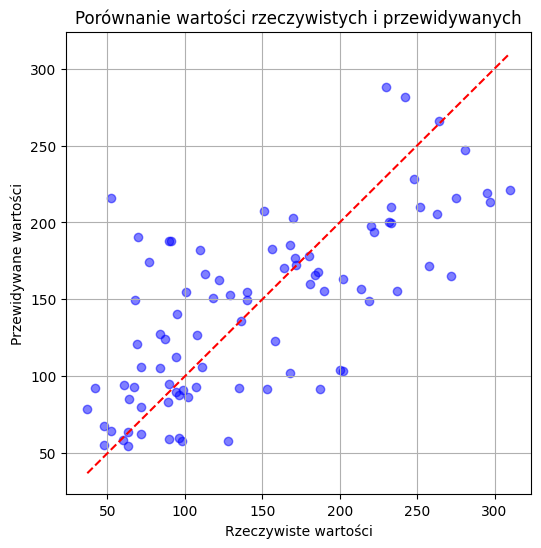

Najlepszy model (100, 50):
MSE: 2696.2317950592583
MAPE: 0.35165941230169545
R^2: 0.491099552629054


In [ ]:
# Najlepszy model: (100, 50)
best_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predykcja na zbiorze testowym
y_pred_best = best_model.predict(X_test_scaled)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Porównanie wartości rzeczywistych i przewidywanych')
plt.grid(True)
plt.show()


mse_best = mean_squared_error(y_test, y_pred_best)
mape_best = mean_absolute_percentage_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Najlepszy model (100, 50):')
print(f'MSE: {mse_best}')
print(f'MAPE: {mape_best}')
print(f'R^2: {r2_best}')


>Wykres rzeczywistych do przewidywanych wartości pokazuje, że model o architekturze (100, 50) nie jest idealnie dopasowany. Widoczna jest rozrzutność predykcji, co sugeruje, że model nadal popełnia błędy.
>
>MSE (2696.23) jest stosunkowo niskie, co oznacza, że model dobrze minimalizuje błąd średniokwadratowy, ale nie jest to wynik satysfakcjonujący.
>
>MAPE (35.17%) wskazuje, że średni względny błąd predykcji wynosi około 35%, co oznacza, że dla niektórych przypadków przewidywania mogą znacząco odbiegać od wartości rzeczywistych.
>
>R² (0.4911) sugeruje, że model wyjaśnia ok. 49% wariancji danych, co może sugerować, że dane mają nieliniowe zależności, których ten model nie uchwycił.
>
>Nieidealne dopasowanie może wynikać z ograniczeń modelu - być może inne architektury lub funkcje aktywacji mogłyby lepiej aproksymować zależność.



---



---



# 4
**Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz dwóch wybranych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.**

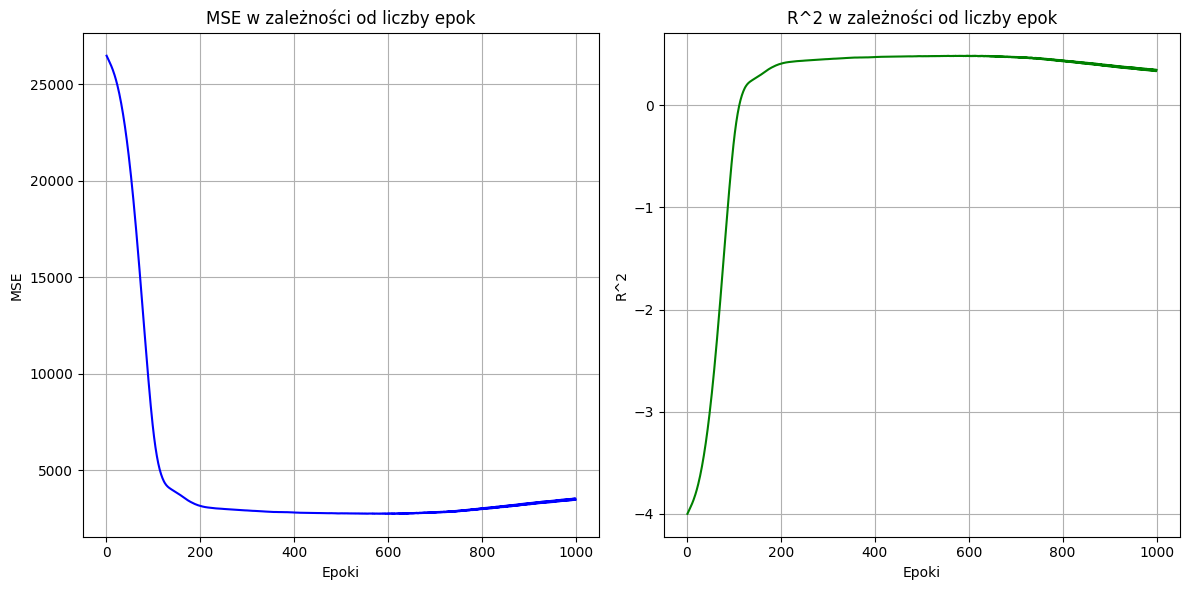

Wyniki po 1000 epokach:
MSE: 3478.10572940018
R^2: 0.3435247055024435


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


best_model_monitor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

mse_epochs = []
r2_epochs = []

for i in range(1, 1001):
    best_model_monitor.fit(X_train_scaled, y_train)  # Trening przez jedną epokę na raz

    # Predykcja na zbiorze testowym
    y_pred_monitor = best_model_monitor.predict(X_test_scaled)

    # Obliczanie MSE i R^2
    mse_monitor = mean_squared_error(y_test, y_pred_monitor)
    r2_monitor = r2_score(y_test, y_pred_monitor)

    mse_epochs.append(mse_monitor)
    r2_epochs.append(r2_monitor)

# Wykres MSE vs Epoki
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), mse_epochs, label='MSE', color='blue')
plt.xlabel('Epoki')
plt.ylabel('MSE')
plt.title('MSE w zależności od liczby epok')
plt.grid(True)

# Wykres R^2 vs Epoki
plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), r2_epochs, label='R^2', color='green')
plt.xlabel('Epoki')
plt.ylabel('R^2')
plt.title('R^2 w zależności od liczby epok')
plt.grid(True)

plt.tight_layout()
plt.show()


print(f'Wyniki po 1000 epokach:')
print(f'MSE: {mse_epochs[-1]}')
print(f'R^2: {r2_epochs[-1]}')


>Wartość MSE zmniejsza się wraz z liczbą epok, co wskazuje na stopniową poprawę dopasowania modelu. Początkowe epoki przynoszą największy spadek MSE, a następnie tempo poprawy zwalnia.
>
>Po około 600 epokach MSE przestaje istotnie maleć, co sugeruje zbliżanie się do optimum.

>Początkowo R² rośnie, wskazując na lepsze wyjaśnienie wariancji przez model. Po pewnym czasie wzrost wartości R² zatrzymuje się i zaczyna oscylować wokół wartości 0.34-0.35.
>
>To sugeruje, że model osiągnął maksymalny poziom dopasowania przy danej architekturze i danych.

*Po 1000 epokach, wartości MSE i R² nie poprawiają się, co sugeruje, że dalsze trenowanie nie przyniesie już istotnych korzyści.*
*Wynik R² = 0.34 oznacza, że model wyjaśnia około 34% wariancji danych, co nie jest wynikiem satysfakcjonującym.*



---



---

